# Setting up a simple NN for the ZDM

This notebook contains the tensorflow code that illustrates the network shown in slide 10 of the presentation.

So first of all, lets create fake training and test dataset. Lets assume that the defect detection camera can move across x and y axis, $x_1$ and $x_2$, respectively; between 0 and 10 cm.

In [75]:
a = [1,2,3]
sum(a[:2]) / 1.5
random.randint(0,11)

7

In [1]:
import random
import pandas as pd
from datetime import datetime
random.seed(datetime.now())

observations = 200



# Create the (x-axis, y-axis, black-intensity) dataset
X = [
    [
        random.randint(0,11),  # x-axis
        random.randint(0,11),  # y-axis
        random.randint(0,255)  # black-intensity
    ]
    for _ in range(observations)
]
Xdf = pd.DataFrame(X, columns=['x-axis', 'y-axis', 'black'])

# Now create what should be the associated actions (correct, throw-trash)
Y = [
    [
        int(round(sum(x[:2]) / 22)), # correct
        1 if x[2] > 170 else 0  # throw-trash
    ]
    for x in Xdf.values
]
Ydf = pd.DataFrame(Y, columns=['correct', 'throw-trash'])

Xdf.head()

,x-axis,y-axis,black
0,3,11,66
1,6,6,238
2,0,7,242
3,1,11,70
4,8,6,250


In [2]:
Ydf.head()

,correct,throw-trash
0,1,0
1,1,1
2,0,1
3,1,0
4,1,1


Now lets create the NN. We're going to use keras API to build it:

In [28]:
import tensorflow as tf


NN_model = tf.keras.Sequential([
    tf.keras.layers.Activation('relu', input_shape=[len(Xdf.keys())]), # (h1,h2,h3)
    tf.keras.layers.Dense(2, use_bias=False), # (correct, throw-trash)=(y1,y2)
])

# Specify stocastic-gradient descend, MSE loss, and MSE as metric
NN_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001),
    #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    loss='mse',
    metrics=['mse']
)


NN_model.build()
NN_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_6 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


You can see that the model summary shows exactly that there are 6 parameters to be trained, i.e., our weights $w_1,\ldots,w_6$ from Figure [?].

Now lets do a very basic trial. We are using the 80% of the dataset to train, and the 20% to test it. 

In [48]:
# 80% train
train_Xdf = Xdf.head(int(0.8 * len(Xdf)))
train_Ydf = Ydf.head(int(0.8 * len(Ydf)))

# 20% test
test_Xdf = Xdf.tail(int(0.2 * len(Xdf)))
test_Ydf = Ydf.tail(int(0.2 * len(Ydf)))

In [49]:
from datetime import datetime

# Lets first remove previous logs
!rm -rf ./logs/ 
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = NN_model.fit(train_Xdf.values, train_Ydf.values,
                    batch_size=10,
                    epochs=1000, # Number of times we iterate over all the dataset
                    #validation_data=(validate_Xdf, validate_Ydf),
                    validation_split = 0.2,
                    callbacks=[tensorboard_callback]) # to latter see how the training went


Train on 128 samples, validate on 32 samples
Epoch 1/1000
128/128 [==============================] - 0s 503us/sample - loss: 9.1899 - mse: 9.1899 - val_loss: 7.8327 - val_mse: 7.8327
Epoch 2/1000
128/128 [==============================] - 0s 331us/sample - loss: 9.1947 - mse: 9.1947 - val_loss: 7.8340 - val_mse: 7.8340
Epoch 3/1000
128/128 [==============================] - 0s 388us/sample - loss: 9.1792 - mse: 9.1792 - val_loss: 7.8348 - val_mse: 7.8348
Epoch 4/1000
128/128 [==============================] - 0s 398us/sample - loss: 9.1855 - mse: 9.1855 - val_loss: 7.8329 - val_mse: 7.8329
Epoch 5/1000
128/128 [==============================] - 0s 367us/sample - loss: 9.1836 - mse: 9.1836 - val_loss: 7.8283 - val_mse: 7.8283
Epoch 6/1000
128/128 [==============================] - 0s 327us/sample - loss: 9.1767 - mse: 9.1767 - val_loss: 7.8182 - val_mse: 7.8182
Epoch 7/1000
128/128 [==============================] - 0s 403us/sample - loss: 9.1722 - mse: 9.1722 - val_loss: 7.8112 - val_m

Epoch 60/1000
128/128 [==============================] - 0s 304us/sample - loss: 8.9498 - mse: 8.9498 - val_loss: 7.6207 - val_mse: 7.6207
Epoch 61/1000
128/128 [==============================] - 0s 272us/sample - loss: 8.9451 - mse: 8.9451 - val_loss: 7.6184 - val_mse: 7.6184
Epoch 62/1000
128/128 [==============================] - 0s 284us/sample - loss: 8.9355 - mse: 8.9355 - val_loss: 7.6157 - val_mse: 7.6157
Epoch 63/1000
128/128 [==============================] - 0s 294us/sample - loss: 8.9309 - mse: 8.9309 - val_loss: 7.6115 - val_mse: 7.6115
Epoch 64/1000
128/128 [==============================] - 0s 318us/sample - loss: 8.9343 - mse: 8.9343 - val_loss: 7.6074 - val_mse: 7.6074
Epoch 65/1000
128/128 [==============================] - 0s 272us/sample - loss: 8.9280 - mse: 8.9280 - val_loss: 7.6014 - val_mse: 7.6014
Epoch 66/1000
128/128 [==============================] - 0s 274us/sample - loss: 8.9295 - mse: 8.9295 - val_loss: 7.5973 - val_mse: 7.5973
Epoch 67/1000
128/128 [====

Epoch 119/1000
128/128 [==============================] - 0s 296us/sample - loss: 8.7126 - mse: 8.7126 - val_loss: 7.4201 - val_mse: 7.4201
Epoch 120/1000
128/128 [==============================] - 0s 290us/sample - loss: 8.7114 - mse: 8.7114 - val_loss: 7.4074 - val_mse: 7.4074
Epoch 121/1000
128/128 [==============================] - 0s 268us/sample - loss: 8.7036 - mse: 8.7036 - val_loss: 7.4001 - val_mse: 7.4001
Epoch 122/1000
128/128 [==============================] - 0s 322us/sample - loss: 8.7103 - mse: 8.7103 - val_loss: 7.3890 - val_mse: 7.3890
Epoch 123/1000
128/128 [==============================] - 0s 305us/sample - loss: 8.6981 - mse: 8.6981 - val_loss: 7.3792 - val_mse: 7.3792
Epoch 124/1000
128/128 [==============================] - 0s 270us/sample - loss: 8.6976 - mse: 8.6976 - val_loss: 7.3730 - val_mse: 7.3730
Epoch 125/1000
128/128 [==============================] - 0s 308us/sample - loss: 8.6902 - mse: 8.6902 - val_loss: 7.3618 - val_mse: 7.3618
Epoch 126/1000
128/1

128/128 [==============================] - 0s 275us/sample - loss: 8.4940 - mse: 8.4940 - val_loss: 7.1922 - val_mse: 7.1922
Epoch 178/1000
128/128 [==============================] - 0s 255us/sample - loss: 8.4859 - mse: 8.4859 - val_loss: 7.1829 - val_mse: 7.1829
Epoch 179/1000
128/128 [==============================] - 0s 281us/sample - loss: 8.4840 - mse: 8.4840 - val_loss: 7.1866 - val_mse: 7.1866
Epoch 180/1000
128/128 [==============================] - 0s 261us/sample - loss: 8.4777 - mse: 8.4777 - val_loss: 7.1835 - val_mse: 7.1835
Epoch 181/1000
128/128 [==============================] - 0s 267us/sample - loss: 8.4696 - mse: 8.4696 - val_loss: 7.1742 - val_mse: 7.1742
Epoch 182/1000
128/128 [==============================] - 0s 237us/sample - loss: 8.4648 - mse: 8.4648 - val_loss: 7.1734 - val_mse: 7.1734
Epoch 183/1000
128/128 [==============================] - 0s 273us/sample - loss: 8.4620 - mse: 8.4620 - val_loss: 7.1724 - val_mse: 7.1724
Epoch 184/1000
128/128 [===========

128/128 [==============================] - 0s 323us/sample - loss: 8.2684 - mse: 8.2684 - val_loss: 6.9786 - val_mse: 6.9786
Epoch 236/1000
128/128 [==============================] - 0s 347us/sample - loss: 8.2566 - mse: 8.2566 - val_loss: 6.9811 - val_mse: 6.9811
Epoch 237/1000
128/128 [==============================] - 0s 287us/sample - loss: 8.2582 - mse: 8.2582 - val_loss: 6.9900 - val_mse: 6.9900
Epoch 238/1000
128/128 [==============================] - 0s 326us/sample - loss: 8.2581 - mse: 8.2580 - val_loss: 6.9801 - val_mse: 6.9801
Epoch 239/1000
128/128 [==============================] - 0s 285us/sample - loss: 8.2498 - mse: 8.2498 - val_loss: 6.9765 - val_mse: 6.9765
Epoch 240/1000
128/128 [==============================] - 0s 295us/sample - loss: 8.2625 - mse: 8.2625 - val_loss: 6.9719 - val_mse: 6.9719
Epoch 241/1000
128/128 [==============================] - 0s 294us/sample - loss: 8.2432 - mse: 8.2432 - val_loss: 6.9646 - val_mse: 6.9646
Epoch 242/1000
128/128 [===========

128/128 [==============================] - 0s 399us/sample - loss: 8.0516 - mse: 8.0516 - val_loss: 6.7940 - val_mse: 6.7940
Epoch 294/1000
128/128 [==============================] - 0s 372us/sample - loss: 8.0494 - mse: 8.0494 - val_loss: 6.8024 - val_mse: 6.8024
Epoch 295/1000
128/128 [==============================] - 0s 327us/sample - loss: 8.0545 - mse: 8.0545 - val_loss: 6.7972 - val_mse: 6.7972
Epoch 296/1000
128/128 [==============================] - 0s 355us/sample - loss: 8.0418 - mse: 8.0418 - val_loss: 6.7869 - val_mse: 6.7869
Epoch 297/1000
128/128 [==============================] - 0s 383us/sample - loss: 8.0458 - mse: 8.0458 - val_loss: 6.7948 - val_mse: 6.7948
Epoch 298/1000
128/128 [==============================] - 0s 354us/sample - loss: 8.0389 - mse: 8.0389 - val_loss: 6.7961 - val_mse: 6.7961
Epoch 299/1000
128/128 [==============================] - 0s 401us/sample - loss: 8.0370 - mse: 8.0370 - val_loss: 6.7769 - val_mse: 6.7769
Epoch 300/1000
128/128 [===========

128/128 [==============================] - 0s 286us/sample - loss: 7.8506 - mse: 7.8506 - val_loss: 6.6153 - val_mse: 6.6153
Epoch 352/1000
128/128 [==============================] - 0s 323us/sample - loss: 7.8488 - mse: 7.8488 - val_loss: 6.6050 - val_mse: 6.6050
Epoch 353/1000
128/128 [==============================] - 0s 311us/sample - loss: 7.8419 - mse: 7.8419 - val_loss: 6.5984 - val_mse: 6.5984
Epoch 354/1000
128/128 [==============================] - 0s 292us/sample - loss: 7.8372 - mse: 7.8372 - val_loss: 6.6067 - val_mse: 6.6067
Epoch 355/1000
128/128 [==============================] - 0s 327us/sample - loss: 7.8392 - mse: 7.8392 - val_loss: 6.6061 - val_mse: 6.6061
Epoch 356/1000
128/128 [==============================] - 0s 336us/sample - loss: 7.8290 - mse: 7.8290 - val_loss: 6.5948 - val_mse: 6.5948
Epoch 357/1000
128/128 [==============================] - 0s 326us/sample - loss: 7.8237 - mse: 7.8237 - val_loss: 6.5997 - val_mse: 6.5997
Epoch 358/1000
128/128 [===========

128/128 [==============================] - 0s 322us/sample - loss: 7.6520 - mse: 7.6520 - val_loss: 6.4276 - val_mse: 6.4276
Epoch 410/1000
128/128 [==============================] - 0s 332us/sample - loss: 7.6485 - mse: 7.6485 - val_loss: 6.4262 - val_mse: 6.4262
Epoch 411/1000
128/128 [==============================] - 0s 381us/sample - loss: 7.6426 - mse: 7.6426 - val_loss: 6.4281 - val_mse: 6.4281
Epoch 412/1000
128/128 [==============================] - 0s 330us/sample - loss: 7.6345 - mse: 7.6345 - val_loss: 6.4200 - val_mse: 6.4200
Epoch 413/1000
128/128 [==============================] - 0s 325us/sample - loss: 7.6319 - mse: 7.6319 - val_loss: 6.4216 - val_mse: 6.4216
Epoch 414/1000
128/128 [==============================] - 0s 338us/sample - loss: 7.6256 - mse: 7.6256 - val_loss: 6.4218 - val_mse: 6.4218
Epoch 415/1000
128/128 [==============================] - 0s 324us/sample - loss: 7.6287 - mse: 7.6287 - val_loss: 6.4179 - val_mse: 6.4179
Epoch 416/1000
128/128 [===========

128/128 [==============================] - 0s 318us/sample - loss: 7.4573 - mse: 7.4573 - val_loss: 6.2573 - val_mse: 6.2573
Epoch 468/1000
128/128 [==============================] - 0s 326us/sample - loss: 7.4555 - mse: 7.4555 - val_loss: 6.2607 - val_mse: 6.2607
Epoch 469/1000
128/128 [==============================] - 0s 311us/sample - loss: 7.4480 - mse: 7.4480 - val_loss: 6.2539 - val_mse: 6.2539
Epoch 470/1000
128/128 [==============================] - 0s 346us/sample - loss: 7.4473 - mse: 7.4473 - val_loss: 6.2567 - val_mse: 6.2567
Epoch 471/1000
128/128 [==============================] - 0s 390us/sample - loss: 7.4378 - mse: 7.4378 - val_loss: 6.2577 - val_mse: 6.2577
Epoch 472/1000
128/128 [==============================] - 0s 352us/sample - loss: 7.4387 - mse: 7.4387 - val_loss: 6.2583 - val_mse: 6.2583
Epoch 473/1000
128/128 [==============================] - 0s 363us/sample - loss: 7.4354 - mse: 7.4354 - val_loss: 6.2498 - val_mse: 6.2498
Epoch 474/1000
128/128 [===========

128/128 [==============================] - 0s 317us/sample - loss: 7.2682 - mse: 7.2682 - val_loss: 6.0858 - val_mse: 6.0858
Epoch 526/1000
128/128 [==============================] - 0s 301us/sample - loss: 7.2601 - mse: 7.2601 - val_loss: 6.0858 - val_mse: 6.0858
Epoch 527/1000
128/128 [==============================] - 0s 410us/sample - loss: 7.2602 - mse: 7.2602 - val_loss: 6.0834 - val_mse: 6.0834
Epoch 528/1000
128/128 [==============================] - 0s 353us/sample - loss: 7.2596 - mse: 7.2596 - val_loss: 6.0814 - val_mse: 6.0814
Epoch 529/1000
128/128 [==============================] - 0s 302us/sample - loss: 7.2535 - mse: 7.2535 - val_loss: 6.0780 - val_mse: 6.0780
Epoch 530/1000
128/128 [==============================] - 0s 260us/sample - loss: 7.2484 - mse: 7.2484 - val_loss: 6.0708 - val_mse: 6.0708
Epoch 531/1000
128/128 [==============================] - 0s 269us/sample - loss: 7.2561 - mse: 7.2561 - val_loss: 6.0671 - val_mse: 6.0672
Epoch 532/1000
128/128 [===========

128/128 [==============================] - 0s 331us/sample - loss: 7.0839 - mse: 7.0839 - val_loss: 5.9105 - val_mse: 5.9105
Epoch 584/1000
128/128 [==============================] - 0s 312us/sample - loss: 7.0822 - mse: 7.0822 - val_loss: 5.9041 - val_mse: 5.9041
Epoch 585/1000
128/128 [==============================] - 0s 328us/sample - loss: 7.0778 - mse: 7.0778 - val_loss: 5.9037 - val_mse: 5.9037
Epoch 586/1000
128/128 [==============================] - 0s 365us/sample - loss: 7.0774 - mse: 7.0774 - val_loss: 5.9120 - val_mse: 5.9120
Epoch 587/1000
128/128 [==============================] - 0s 328us/sample - loss: 7.0714 - mse: 7.0714 - val_loss: 5.9084 - val_mse: 5.9084
Epoch 588/1000
128/128 [==============================] - 0s 300us/sample - loss: 7.0713 - mse: 7.0713 - val_loss: 5.9074 - val_mse: 5.9074
Epoch 589/1000
128/128 [==============================] - 0s 338us/sample - loss: 7.0632 - mse: 7.0632 - val_loss: 5.9101 - val_mse: 5.9101
Epoch 590/1000
128/128 [===========

128/128 [==============================] - 0s 381us/sample - loss: 6.9039 - mse: 6.9039 - val_loss: 5.7637 - val_mse: 5.7637
Epoch 642/1000
128/128 [==============================] - 0s 368us/sample - loss: 6.9015 - mse: 6.9015 - val_loss: 5.7539 - val_mse: 5.7539
Epoch 643/1000
128/128 [==============================] - 0s 296us/sample - loss: 6.9025 - mse: 6.9025 - val_loss: 5.7502 - val_mse: 5.7502
Epoch 644/1000
128/128 [==============================] - 0s 281us/sample - loss: 6.8959 - mse: 6.8959 - val_loss: 5.7540 - val_mse: 5.7540
Epoch 645/1000
128/128 [==============================] - 0s 294us/sample - loss: 6.8960 - mse: 6.8960 - val_loss: 5.7436 - val_mse: 5.7436
Epoch 646/1000
128/128 [==============================] - 0s 289us/sample - loss: 6.8907 - mse: 6.8907 - val_loss: 5.7406 - val_mse: 5.7406
Epoch 647/1000
128/128 [==============================] - 0s 327us/sample - loss: 6.8881 - mse: 6.8881 - val_loss: 5.7410 - val_mse: 5.7410
Epoch 648/1000
128/128 [===========

128/128 [==============================] - 0s 299us/sample - loss: 6.7361 - mse: 6.7361 - val_loss: 5.6113 - val_mse: 5.6113
Epoch 700/1000
128/128 [==============================] - 0s 325us/sample - loss: 6.7314 - mse: 6.7314 - val_loss: 5.6011 - val_mse: 5.6011
Epoch 701/1000
128/128 [==============================] - 0s 289us/sample - loss: 6.7276 - mse: 6.7276 - val_loss: 5.6058 - val_mse: 5.6058
Epoch 702/1000
128/128 [==============================] - 0s 296us/sample - loss: 6.7265 - mse: 6.7265 - val_loss: 5.5996 - val_mse: 5.5996
Epoch 703/1000
128/128 [==============================] - 0s 354us/sample - loss: 6.7209 - mse: 6.7209 - val_loss: 5.5887 - val_mse: 5.5887
Epoch 704/1000
128/128 [==============================] - 0s 354us/sample - loss: 6.7205 - mse: 6.7205 - val_loss: 5.5806 - val_mse: 5.5806
Epoch 705/1000
128/128 [==============================] - 0s 333us/sample - loss: 6.7218 - mse: 6.7218 - val_loss: 5.5803 - val_mse: 5.5803
Epoch 706/1000
128/128 [===========

128/128 [==============================] - 0s 295us/sample - loss: 6.5644 - mse: 6.5644 - val_loss: 5.4513 - val_mse: 5.4513
Epoch 758/1000
128/128 [==============================] - 0s 331us/sample - loss: 6.5633 - mse: 6.5633 - val_loss: 5.4525 - val_mse: 5.4525
Epoch 759/1000
128/128 [==============================] - 0s 268us/sample - loss: 6.5612 - mse: 6.5612 - val_loss: 5.4522 - val_mse: 5.4522
Epoch 760/1000
128/128 [==============================] - 0s 298us/sample - loss: 6.5555 - mse: 6.5555 - val_loss: 5.4453 - val_mse: 5.4453
Epoch 761/1000
128/128 [==============================] - 0s 384us/sample - loss: 6.5555 - mse: 6.5555 - val_loss: 5.4493 - val_mse: 5.4493
Epoch 762/1000
128/128 [==============================] - 0s 308us/sample - loss: 6.5540 - mse: 6.5540 - val_loss: 5.4446 - val_mse: 5.4446
Epoch 763/1000
128/128 [==============================] - 0s 280us/sample - loss: 6.5529 - mse: 6.5529 - val_loss: 5.4425 - val_mse: 5.4425
Epoch 764/1000
128/128 [===========

128/128 [==============================] - 0s 362us/sample - loss: 6.4082 - mse: 6.4082 - val_loss: 5.3167 - val_mse: 5.3167
Epoch 816/1000
128/128 [==============================] - 0s 335us/sample - loss: 6.4055 - mse: 6.4055 - val_loss: 5.3126 - val_mse: 5.3126
Epoch 817/1000
128/128 [==============================] - 0s 321us/sample - loss: 6.3962 - mse: 6.3962 - val_loss: 5.3103 - val_mse: 5.3103
Epoch 818/1000
128/128 [==============================] - 0s 294us/sample - loss: 6.3945 - mse: 6.3945 - val_loss: 5.3004 - val_mse: 5.3004
Epoch 819/1000
128/128 [==============================] - 0s 326us/sample - loss: 6.3907 - mse: 6.3907 - val_loss: 5.3018 - val_mse: 5.3018
Epoch 820/1000
128/128 [==============================] - 0s 270us/sample - loss: 6.3938 - mse: 6.3938 - val_loss: 5.2965 - val_mse: 5.2965
Epoch 821/1000
128/128 [==============================] - 0s 332us/sample - loss: 6.3866 - mse: 6.3866 - val_loss: 5.2951 - val_mse: 5.2951
Epoch 822/1000
128/128 [===========

128/128 [==============================] - 0s 280us/sample - loss: 6.2475 - mse: 6.2475 - val_loss: 5.1716 - val_mse: 5.1716
Epoch 874/1000
128/128 [==============================] - 0s 307us/sample - loss: 6.2434 - mse: 6.2434 - val_loss: 5.1691 - val_mse: 5.1691
Epoch 875/1000
128/128 [==============================] - 0s 301us/sample - loss: 6.2420 - mse: 6.2420 - val_loss: 5.1711 - val_mse: 5.1711
Epoch 876/1000
128/128 [==============================] - 0s 443us/sample - loss: 6.2390 - mse: 6.2390 - val_loss: 5.1643 - val_mse: 5.1643
Epoch 877/1000
128/128 [==============================] - 0s 306us/sample - loss: 6.2411 - mse: 6.2411 - val_loss: 5.1613 - val_mse: 5.1613
Epoch 878/1000
128/128 [==============================] - 0s 284us/sample - loss: 6.2367 - mse: 6.2367 - val_loss: 5.1661 - val_mse: 5.1661
Epoch 879/1000
128/128 [==============================] - 0s 288us/sample - loss: 6.2317 - mse: 6.2317 - val_loss: 5.1593 - val_mse: 5.1593
Epoch 880/1000
128/128 [===========

128/128 [==============================] - 0s 298us/sample - loss: 6.0976 - mse: 6.0976 - val_loss: 5.0314 - val_mse: 5.0314
Epoch 932/1000
128/128 [==============================] - 0s 310us/sample - loss: 6.0934 - mse: 6.0934 - val_loss: 5.0270 - val_mse: 5.0270
Epoch 933/1000
128/128 [==============================] - 0s 247us/sample - loss: 6.0909 - mse: 6.0908 - val_loss: 5.0313 - val_mse: 5.0313
Epoch 934/1000
128/128 [==============================] - 0s 300us/sample - loss: 6.0877 - mse: 6.0877 - val_loss: 5.0299 - val_mse: 5.0299
Epoch 935/1000
128/128 [==============================] - 0s 265us/sample - loss: 6.0873 - mse: 6.0873 - val_loss: 5.0220 - val_mse: 5.0220
Epoch 936/1000
128/128 [==============================] - 0s 266us/sample - loss: 6.0810 - mse: 6.0810 - val_loss: 5.0188 - val_mse: 5.0188
Epoch 937/1000
128/128 [==============================] - 0s 346us/sample - loss: 6.0814 - mse: 6.0814 - val_loss: 5.0181 - val_mse: 5.0181
Epoch 938/1000
128/128 [===========

128/128 [==============================] - 0s 284us/sample - loss: 5.9497 - mse: 5.9497 - val_loss: 4.9044 - val_mse: 4.9044
Epoch 990/1000
128/128 [==============================] - 0s 287us/sample - loss: 5.9481 - mse: 5.9481 - val_loss: 4.9020 - val_mse: 4.9020
Epoch 991/1000
128/128 [==============================] - 0s 274us/sample - loss: 5.9468 - mse: 5.9468 - val_loss: 4.8960 - val_mse: 4.8960
Epoch 992/1000
128/128 [==============================] - 0s 286us/sample - loss: 5.9397 - mse: 5.9397 - val_loss: 4.8919 - val_mse: 4.8919
Epoch 993/1000
128/128 [==============================] - 0s 314us/sample - loss: 5.9319 - mse: 5.9319 - val_loss: 4.8874 - val_mse: 4.8874
Epoch 994/1000
128/128 [==============================] - 0s 298us/sample - loss: 5.9299 - mse: 5.9299 - val_loss: 4.8813 - val_mse: 4.8813
Epoch 995/1000
128/128 [==============================] - 0s 286us/sample - loss: 5.9284 - mse: 5.9284 - val_loss: 4.8844 - val_mse: 4.8844
Epoch 996/1000
128/128 [===========

Let's see how the MSE decresed during the training. For this we'll use tensorboard, note you should have it installed.

In [31]:
%load_ext tensorboard
%tensorboard --logdir logs/scalars

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7901), started 0:15:32 ago. (Use '!kill 7901' to kill it.)

Now we can check how the NN predicts:

In [32]:
test_predictions = pd.DataFrame(NN_model.predict(test_Xdf),
                                columns=['correct', 'throw-trash'])
test_predictions.head()

,correct,throw-trash
0,-0.619633,-3.351252
1,-3.820040,-1.053583
2,-4.647676,1.294183
3,3.025087,1.388216
4,1.863550,3.042969


## Keep output between [0,1]

So clearly there is a problem here, right?

We'd like our output to be between $[0,1]$. And in our case we can go for a work around, the **sigmoid** function:

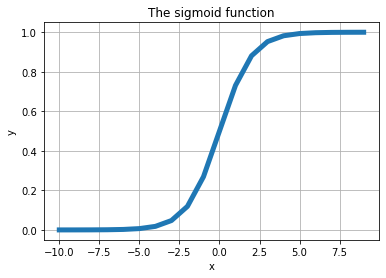

In [26]:
import matplotlib.pyplot as plt
from math import exp

plt.plot(range(-10,10), [1/(1+exp(-x)) for x in range(-10,10)],
         linewidth=5)
plt.title('The sigmoid function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Thus, we can easily incorporate a sigmoid layer after our output layer, so both $y_1,y_2$ lie inside $[0,1]$:

In [50]:
NN_model2 = tf.keras.Sequential([
    tf.keras.layers.Activation('relu', input_shape=[len(Xdf.keys())]), 
    tf.keras.layers.Dense(2, use_bias=False), 
    tf.keras.layers.Activation('sigmoid') ## THIS IS THE SIGMOID LAYER
])

# Specify stocastic-gradient descend, MSE loss, and MSE as metric
NN_model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mse',
    metrics=['mse']
)


NN_model2.build()
NN_model2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_11 (Activation)   (None, 3)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Let's train our new network:

In [51]:
from datetime import datetime

# Lets first remove previous logs
!rm -rf ./logs2/ 
logdir = "logs2/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = NN_model2.fit(train_Xdf.values, train_Ydf.values,
                    batch_size=10,
                    epochs=1000, # Number of times we iterate over all the dataset
                    #validation_data=(validate_Xdf, validate_Ydf),
                    validation_split = 0.2,
                    callbacks=[tensorboard_callback]) # to latter see how the training went


Train on 128 samples, validate on 32 samples
Epoch 1/1000
128/128 [==============================] - 0s 3ms/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 2/1000
128/128 [==============================] - 0s 301us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 3/1000
128/128 [==============================] - 0s 341us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 4/1000
128/128 [==============================] - 0s 371us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 5/1000
128/128 [==============================] - 0s 351us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 6/1000
128/128 [==============================] - 0s 350us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 7/1000
128/128 [==============================] - 0s 390us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse

Epoch 60/1000
128/128 [==============================] - 0s 388us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 61/1000
128/128 [==============================] - 0s 322us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 62/1000
128/128 [==============================] - 0s 296us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 63/1000
128/128 [==============================] - 0s 262us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 64/1000
128/128 [==============================] - 0s 277us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 65/1000
128/128 [==============================] - 0s 309us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 66/1000
128/128 [==============================] - 0s 316us/sample - loss: 0.4498 - mse: 0.4498 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 67/1000
128/128 [====

Epoch 119/1000
128/128 [==============================] - 0s 381us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 120/1000
128/128 [==============================] - 0s 374us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 121/1000
128/128 [==============================] - 0s 316us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 122/1000
128/128 [==============================] - 0s 325us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 123/1000
128/128 [==============================] - 0s 384us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 124/1000
128/128 [==============================] - 0s 375us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 125/1000
128/128 [==============================] - 0s 311us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 126/1000
128/1

128/128 [==============================] - 0s 314us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 178/1000
128/128 [==============================] - 0s 365us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 179/1000
128/128 [==============================] - 0s 390us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 180/1000
128/128 [==============================] - 0s 298us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 181/1000
128/128 [==============================] - 0s 322us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 182/1000
128/128 [==============================] - 0s 323us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 183/1000
128/128 [==============================] - 0s 365us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 184/1000
128/128 [===========

128/128 [==============================] - 0s 335us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 236/1000
128/128 [==============================] - 0s 403us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 237/1000
128/128 [==============================] - 0s 321us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 238/1000
128/128 [==============================] - 0s 266us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 239/1000
128/128 [==============================] - 0s 284us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 240/1000
128/128 [==============================] - 0s 313us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 241/1000
128/128 [==============================] - 0s 402us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 242/1000
128/128 [===========

128/128 [==============================] - 0s 359us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 294/1000
128/128 [==============================] - 0s 335us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 295/1000
128/128 [==============================] - 0s 405us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 296/1000
128/128 [==============================] - 0s 369us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 297/1000
128/128 [==============================] - 0s 347us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 298/1000
128/128 [==============================] - 0s 314us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 299/1000
128/128 [==============================] - 0s 305us/sample - loss: 0.4497 - mse: 0.4497 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 300/1000
128/128 [===========

128/128 [==============================] - 0s 354us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 352/1000
128/128 [==============================] - 0s 333us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 353/1000
128/128 [==============================] - 0s 346us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 354/1000
128/128 [==============================] - 0s 294us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 355/1000
128/128 [==============================] - 0s 315us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 356/1000
128/128 [==============================] - 0s 281us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 357/1000
128/128 [==============================] - 0s 305us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 358/1000
128/128 [===========

128/128 [==============================] - 0s 300us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 410/1000
128/128 [==============================] - 0s 316us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 411/1000
128/128 [==============================] - 0s 337us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 412/1000
128/128 [==============================] - 0s 362us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 413/1000
128/128 [==============================] - 0s 302us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 414/1000
128/128 [==============================] - 0s 288us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 415/1000
128/128 [==============================] - 0s 278us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4999 - val_mse: 0.4999
Epoch 416/1000
128/128 [===========

128/128 [==============================] - 0s 304us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 468/1000
128/128 [==============================] - 0s 274us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 469/1000
128/128 [==============================] - 0s 291us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 470/1000
128/128 [==============================] - 0s 353us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 471/1000
128/128 [==============================] - 0s 366us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 472/1000
128/128 [==============================] - 0s 285us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 473/1000
128/128 [==============================] - 0s 283us/sample - loss: 0.4496 - mse: 0.4496 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 474/1000
128/128 [===========

128/128 [==============================] - 0s 323us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 526/1000
128/128 [==============================] - 0s 384us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 527/1000
128/128 [==============================] - 0s 368us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 528/1000
128/128 [==============================] - 0s 315us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 529/1000
128/128 [==============================] - 0s 312us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 530/1000
128/128 [==============================] - 0s 374us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 531/1000
128/128 [==============================] - 0s 314us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 532/1000
128/128 [===========

128/128 [==============================] - 0s 507us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 584/1000
128/128 [==============================] - 0s 391us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 585/1000
128/128 [==============================] - 0s 391us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 586/1000
128/128 [==============================] - 0s 356us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 587/1000
128/128 [==============================] - 0s 319us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 588/1000
128/128 [==============================] - 0s 295us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 589/1000
128/128 [==============================] - 0s 327us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 590/1000
128/128 [===========

128/128 [==============================] - 0s 360us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 642/1000
128/128 [==============================] - 0s 327us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 643/1000
128/128 [==============================] - 0s 268us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 644/1000
128/128 [==============================] - 0s 279us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 645/1000
128/128 [==============================] - 0s 271us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 646/1000
128/128 [==============================] - 0s 343us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 647/1000
128/128 [==============================] - 0s 262us/sample - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 648/1000
128/128 [===========

128/128 [==============================] - 0s 369us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 700/1000
128/128 [==============================] - 0s 375us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 701/1000
128/128 [==============================] - 0s 374us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 702/1000
128/128 [==============================] - 0s 425us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 703/1000
128/128 [==============================] - 0s 366us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 704/1000
128/128 [==============================] - 0s 367us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 705/1000
128/128 [==============================] - 0s 333us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 706/1000
128/128 [===========

128/128 [==============================] - 0s 307us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 758/1000
128/128 [==============================] - 0s 412us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 759/1000
128/128 [==============================] - 0s 329us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 760/1000
128/128 [==============================] - 0s 265us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 761/1000
128/128 [==============================] - 0s 300us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 762/1000
128/128 [==============================] - 0s 332us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 763/1000
128/128 [==============================] - 0s 316us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 764/1000
128/128 [===========

128/128 [==============================] - 0s 295us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 816/1000
128/128 [==============================] - 0s 378us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 817/1000
128/128 [==============================] - 0s 342us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 818/1000
128/128 [==============================] - 0s 300us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 819/1000
128/128 [==============================] - 0s 310us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 820/1000
128/128 [==============================] - 0s 312us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 821/1000
128/128 [==============================] - 0s 326us/sample - loss: 0.4494 - mse: 0.4494 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 822/1000
128/128 [===========

128/128 [==============================] - 0s 373us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 874/1000
128/128 [==============================] - 0s 385us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 875/1000
128/128 [==============================] - 0s 341us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 876/1000
128/128 [==============================] - 0s 295us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 877/1000
128/128 [==============================] - 0s 312us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 878/1000
128/128 [==============================] - 0s 287us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 879/1000
128/128 [==============================] - 0s 287us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 880/1000
128/128 [===========

128/128 [==============================] - 0s 406us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 932/1000
128/128 [==============================] - 0s 503us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 933/1000
128/128 [==============================] - 0s 372us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 934/1000
128/128 [==============================] - 0s 328us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 935/1000
128/128 [==============================] - 0s 309us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 936/1000
128/128 [==============================] - 0s 340us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4998 - val_mse: 0.4998
Epoch 937/1000
128/128 [==============================] - 0s 311us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 938/1000
128/128 [===========

128/128 [==============================] - 0s 283us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 990/1000
128/128 [==============================] - 0s 303us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 991/1000
128/128 [==============================] - 0s 281us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 992/1000
128/128 [==============================] - 0s 316us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 993/1000
128/128 [==============================] - 0s 297us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 994/1000
128/128 [==============================] - 0s 305us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 995/1000
128/128 [==============================] - 0s 334us/sample - loss: 0.4493 - mse: 0.4493 - val_loss: 0.4997 - val_mse: 0.4997
Epoch 996/1000
128/128 [===========

In [52]:
test_predictions2 = pd.DataFrame(NN_model2.predict(test_Xdf),
                                columns=['correct', 'throw-trash'])
test_predictions2.head()

,correct,throw-trash
0,0.191935,1.190840e-03
1,1.000000,4.123253e-09
2,1.000000,1.063249e-10
3,1.000000,6.235026e-12
4,1.000000,1.067060e-15


Now that we have the output lying in $[0,1]$, it's time to see how good we predict:

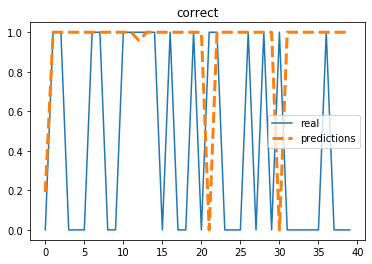

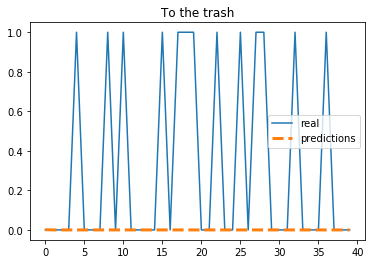

In [65]:
# Plot correction output
plt.plot(test_Ydf['correct'].values, label='real')
plt.plot(test_predictions2['correct'].values, label='predictions', ls='dashed', lw=3)
plt.legend()
plt.title('correct')
plt.show()


# Plot trash output
plt.plot(test_Ydf['throw-trash'].values, label='real')
plt.plot(test_predictions2['throw-trash'].values, label='predictions', ls='dashed', lw=3)
plt.legend()
plt.title('To the trash')
plt.show()